In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

## 4.1 An Overview of Classification

In [2]:
cd ..

C:\Users\lamtr\Introduction to Statistical Learning


In [3]:
cd datasets

C:\Users\lamtr\Introduction to Statistical Learning\datasets


In [4]:
default = pd.read_csv("Default.csv")

In [5]:
default.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [6]:
default

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


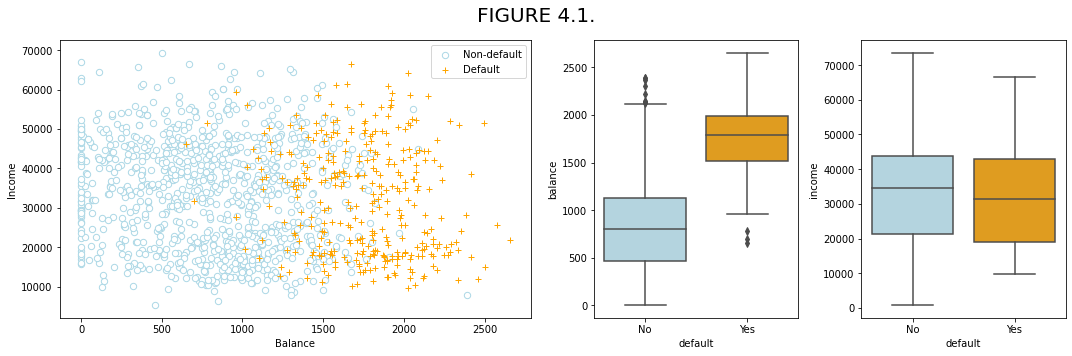

In [7]:
fig = plt.figure(figsize=(15, 5))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=4)
#plot scatter of income on balance for default and non-default individuals
ax1 = fig.add_subplot(gs[0, :2])
default_yes = default[default.default == "Yes"]
default_no = default[default.default=="No"].sample(frac=0.1)
ax1.scatter(default_no.balance, default_no.income, marker='o', c='white',  edgecolors='lightblue', s=40, linewidths=1, alpha=1)
ax1.scatter(default_yes.balance, default_yes.income, marker='+', c='orange', s=40, linewidths=1)
ax1.set(xlabel="Balance", ylabel="Income")
ax1.legend(["Non-default", "Default"])

c_palette = {"No": "lightblue", "Yes":"Orange"}
ax2 = fig.add_subplot(gs[0, -2])
sns.boxplot(x="default",  y="balance", data=default, palette=c_palette)
ax3 = fig.add_subplot(gs[0, -1])
sns.boxplot(x="default",  y="income", data=default, palette=c_palette)
plt.suptitle("FIGURE 4.1.", fontsize=20)
plt.tight_layout()

Those who default have higher balance in their credit card and those who do not. However, the income ranges between two groups are not different.

In [8]:
# In R, I exported the dataset from package 'ISLR' to an Excel file
df = pd.read_csv('Default.csv')
# Note: factorize() returns two objects: a label array and an array with the unique values.
# We are only interested in the first object. 
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.head(3)

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0


## 4.2 Why Not Linear Regression?

In [9]:
from sklearn.linear_model import LogisticRegression
from matplotlib.gridspec import GridSpec
import statsmodels.formula.api as smf
import statsmodels.api as sm

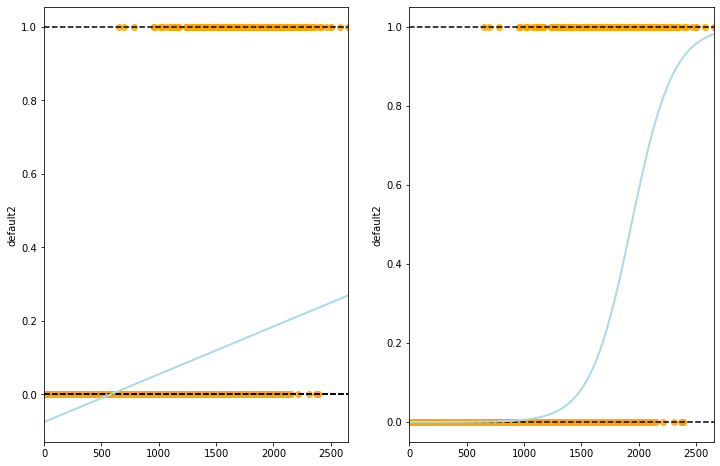

In [10]:
X = df.balance.values.reshape(-1, 1)
y = df.default2
clf = LogisticRegression()
clf.fit(X, y)
y_pred = clf.predict_proba(X)
plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2)
ax1 = plt.subplot(gs[:, 0])
sns.regplot(x=X,
            y=y,
            logistic=False,
            scatter_kws={"color": "orange"},
            line_kws={
                "color": "lightblue",
                "linewidth": 2
            },
            ci=False, ax=ax1)
ax2 = plt.subplot(gs[:, 1])
sns.regplot(x=X, y=y, logistic=True, scatter_kws={"color": "orange"}, line_kws={"color": "lightblue", "linewidth": 2}, ax=ax2, ci=False)
ax1.hlines(y=0, linestyle='--', color="k", xmin=ax1.xaxis.get_data_interval()[0], xmax=ax1.xaxis.get_data_interval()[1])
ax1.hlines(y=0, linestyle='--', color="k", xmin=ax1.xaxis.get_data_interval()[0], xmax=ax1.xaxis.get_data_interval()[1])
for ax in plt.gcf().axes:
    ax.hlines(y=0, linestyle='--', color="k", xmin=ax.xaxis.get_data_interval()[0], xmax=ax.xaxis.get_data_interval()[1])
    ax.hlines(y=1, linestyle='--', color="k", xmin=ax.xaxis.get_data_interval()[0], xmax=ax.xaxis.get_data_interval()[1])

In [11]:
y = df.default2
X_train = df.balance.values.reshape(-1, 1)

In [12]:
X_train

array([[ 729.52649521],
       [ 817.18040655],
       [1073.54916401],
       ...,
       [ 845.41198922],
       [1569.00905338],
       [ 200.92218264]])

In [13]:
est = sm.Logit(y, np.c_[np.ones((X_train.shape[0], 1)), X_train]).fit()
est.summary()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               default2   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Thu, 23 Sep 2021   Pseudo R-squ.:                  0.4534
Time:                        13:51:23   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.6513      0.361    -29.491      0.000     -11.359      -9.943
x1             0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

As we can see, $\hat{B}_{1}$ = 0.0055 means that an increase in balance is associated with an increase in probability of default. More specifically, one increase in $\hat{B}_{1}$ is associated with an increase in log odds of `default` by 0.0055

In [14]:
clf = LogisticRegression()
clf.fit(X_train, y)
print(clf.classes_, clf.coef_, clf.intercept_)

[0 1] [[0.00549892]] [-10.65132824]


In [15]:
X = default["student"].map({"Yes":1, "No":0}).values.reshape(-1, 1)
y = default.default.map({"Yes": 1, "No": 0})

In [16]:
np.c_[np.ones((X.shape[0], 1)), X]

array([[1., 0.],
       [1., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 1.]])

In [17]:
clf = LogisticRegression(fit_intercept=True)
clf.fit(X, y)
print("Accuracy:",clf.score(X, y))
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)


Accuracy: 0.9667
Coefficients: [[0.39960123]]
Intercept: [-3.50213253]


In [18]:
est.prsquared

0.4533915939219042

#### Table 4.2

In [19]:
est = sm.Logit(y, np.c_[np.ones((X.shape[0], 1)),X]).fit()
display(est.summary().tables[1])

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


,coef,std err,z,P>|z|,[0.025,0.975]
const,-3.5041,0.071,-49.554,0.000,-3.643,-3.366
x1,0.4049,0.115,3.520,0.000,0.179,0.630


As can be seen, the coefficient associated with Student predictor after using one-hot encoder is positive together with statistically significant p-values. This show that students have higher probability of default than non-student.

### 4.3.4 Multiple Logistic Regression

In [20]:
df

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0
...,...,...,...,...,...,...
9995,No,No,711.555020,52992.378914,0,0
9996,No,No,757.962918,19660.721768,0,0
9997,No,No,845.411989,58636.156984,0,0
9998,No,No,1569.009053,36669.112365,0,0


#### Table 4.3

This is a coefficient estimate for a logistic regression model using balance, student, income as predictors for prediction of default probability.

In [21]:
est = smf.logit("default2 ~ student + balance + income", data=df).fit()
est.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-10.8690,0.492,-22.079,0.000,-11.834,-9.904
student[T.Yes],-0.6468,0.236,-2.738,0.006,-1.110,-0.184
balance,0.0057,0.000,24.737,0.000,0.005,0.006
income,3.033e-06,8.2e-06,0.370,0.712,-1.3e-05,1.91e-05


In [22]:
df

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0
...,...,...,...,...,...,...
9995,No,No,711.555020,52992.378914,0,0
9996,No,No,757.962918,19660.721768,0,0
9997,No,No,845.411989,58636.156984,0,0
9998,No,No,1569.009053,36669.112365,0,0


In [23]:
df[(df["student"] == "Yes") & (df["default"] == "Yes")]

,default,student,balance,income,default2,student2
136,Yes,Yes,1486.998122,17854.397028,1,1
173,Yes,Yes,2205.799521,14271.492253,1,1
201,Yes,Yes,1774.694223,20359.506086,1,1
209,Yes,Yes,1899.390626,20655.200003,1,1
241,Yes,Yes,1572.856481,14930.178331,1,1
...,...,...,...,...,...,...
9510,Yes,Yes,1726.479610,13654.604938,1,1
9610,Yes,Yes,1502.186739,18603.495532,1,1
9783,Yes,Yes,1530.551479,13003.929205,1,1
9796,Yes,Yes,1867.308569,24720.480559,1,1


In [24]:
student_byDefault = df.groupby(["student", "default"]).size().unstack(level="default")
display(student_byDefault)

default,No,Yes
student,,
No,6850,206
Yes,2817,127


In [25]:
student_byDefault / student_byDefault.sum(axis=1)

default,No,Yes
student,,
No,0.970805,0.069973
Yes,0.399235,0.043139


In [26]:
student_byDefault2 = df.groupby(["student"])["default"].value_counts(normalize=True).unstack(level=-1)

student_byDefault2

default,No,Yes
student,,
No,0.970805,0.029195
Yes,0.956861,0.043139


In [27]:
#balance of student status as X, default as y
X_student_balance = df[df["student"] == "Yes"].balance.values.reshape(-1, 1)
y_student_balance = df[df["student"] == "Yes"].default2
#balance of non student status as X, default as y
X_nonstudent_balance = df[df["student"] == "No"].balance.values.reshape(-1, 1)
y_nonstudent_balance = df[df["student"] == "No"].default.map({"Yes": 1, "No": 0})
#balance values for prediction
X_test = np.linspace(df.balance.min(), df.balance.max(), 100).reshape(-1, 1)
#logistic regression coeffiecient estimate using balance of student as predictor for the response default y
clf_student = LogisticRegression()
clf_student.fit(X_student_balance, y_student_balance)
prob_student = clf_student.predict_proba(X_test)
clf_nonstudent = LogisticRegression()
clf_nonstudent.fit(X_nonstudent_balance, y_nonstudent_balance)
prob_nonstudent = clf_nonstudent.predict_proba(X_test)
#

In [28]:
student_byDefault2.index

Index(['No', 'Yes'], dtype='object', name='student')

In [29]:
ax1.xaxis.get_data_interval()[0]

0.0

#### Figure 4.3

[Text(0.5, 0, 'Student Status'), Text(0, 0.5, 'Credit Card Balance')]

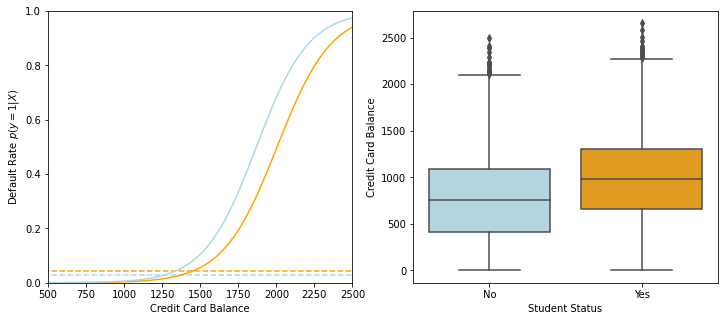

In [30]:

#creating plots
fig = plt.figure(figsize=(12, 5))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2)
ax1 = fig.add_subplot(gs[:, 0])
ax1.plot(X_test,
         prob_student[:, 1],
         linestyle='-',
         color='orange',
         label="Student")
ax1.plot(X_test,
         prob_nonstudent[:, 1],
         linestyle='-',
         color="lightblue",
         label="Non-student")
ax1.hlines(y=student_byDefault2.loc["Yes", "Yes"],
           xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyle='--', color="orange", label="Averaged prob for students" )
ax1.hlines(y=student_byDefault2.loc["No", "Yes"],
          xmin=ax1.xaxis.get_data_interval()[0],
          xmax=ax1.xaxis.get_data_interval()[1], linestyle='--', color="lightblue", label="Averaged prob for non-students")
ax1.set(xlim=[500, 2500], ylim=[0, 1], xlabel="Credit Card Balance", ylabel="Default Rate $p(y=1|X)$")
ax1.xaxis.label.set_size(10)
ax1.yaxis.label.set_size(10)
#plot boxplot
c_palette = {"Yes": "orange", "No": "lightblue"}
ax2 = fig.add_subplot(gs[:, 1])
sns.boxplot(x="student", y="balance", data=df, ax=ax2, palette=c_palette)
ax2.set(xlabel="Student Status", ylabel="Credit Card Balance")

The coefficient in associatation between `Student` and `Default` is negative for single variable logistic regression while positive for multiple logistic regression. Negative means that the presence of student status leads to a decrease in probability of default and vice versa, keeping all other predictors fixed in case of multiple logistic regression. On the left-hand panel of the Figure 4.3, it is shown that the default rate of student is equal to or lower than that of non-student observations given the same credit card balance. However, the broken line of the left-side figure representing the averaged default rate shows that student always has higher default rate. This explains the reason why `student` has positive coefficient in the case of single variable logistic regression. The right-hand panel - the blox plot digs deeper into the opposite signs of `student`. The variable `student` and `credit card balance` are correlated.Student observations tend to have higher credit card balance. In combination with the left-hand panel, it is inferred that though at the same level of balance, students have lower chance of getting default, yet they tend to hold higher balance leading to higher overall default rate.

In [31]:
df

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0
...,...,...,...,...,...,...
9995,No,No,711.555020,52992.378914,0,0
9996,No,No,757.962918,19660.721768,0,0
9997,No,No,845.411989,58636.156984,0,0
9998,No,No,1569.009053,36669.112365,0,0


In [32]:
X = df[["student2", "balance", "income"]].values
y = df.default2
from sklearn.linear_model  import LogisticRegression
clf = LogisticRegression(fit_intercept=True, solver="newton-cg")
clf.fit(X, y)
print("Coefficients:", clf.coef_)
print("Intercept:", clf.intercept_)
print("Predict [1, 1500, 40000]", clf.predict_proba([[1, 1500, 40000]]))
print("Predict [0, 1500, 40000]", clf.predict_proba([[0, 1500, 40000]]))

C:\Users\lamtr\anaconda3\envs\clone_3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\lamtr\anaconda3\envs\clone_3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


Coefficients: [[-6.27150283e-01  5.71242114e-03  3.28816044e-06]]
Intercept: [-10.84449775]
Predict [1, 1500, 40000] [[0.94111561 0.05888439]]
Predict [0, 1500, 40000] [[0.89513865 0.10486135]]


C:\Users\lamtr\anaconda3\envs\clone_3\lib\site-packages\sklearn\utils\optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


## 4.4 Linear Discriminant Analysis


In [33]:
df

,default,student,balance,income,default2,student2
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0
...,...,...,...,...,...,...
9995,No,No,711.555020,52992.378914,0,0
9996,No,No,757.962918,19660.721768,0,0
9997,No,No,845.411989,58636.156984,0,0
9998,No,No,1569.009053,36669.112365,0,0


In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [35]:
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
X = df[["student2", "balance"]].values
y = df.default
lda.fit(X, y)
print(lda.coef_)
print(lda.means_)
print(lda.priors_)
print(lda.covariance_)

[[-0.52203542  0.00470432]]
[[2.91403745e-01 8.03943750e+02]
 [3.81381381e-01 1.74782169e+03]]
[0.9667 0.0333]
[[2.07468022e-01 4.21453998e+01]
 [4.21453998e+01 2.05277550e+05]]


In [36]:
predicted = lda.predict(X)
confusion_matrix = pd.DataFrame({
    "Predicted": predicted,
    "True default status": y
}).replace({
    0: "No",
    1: "Yes"
}).value_counts().unstack(level=-1)

In [37]:
print("Accuracy on training set:", lda.score(X, y))

Accuracy on training set: 0.9725


In [38]:
print("Training misclassification: %.4f"%(1-lda.score(X, y)))

Training misclassification: 0.0275


In [39]:
smf.logit("default2 ~ balance + income + student2", data=df).fit().summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.078577
         Iterations 10


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-10.8690,0.492,-22.079,0.000,-11.834,-9.904
balance,0.0057,0.000,24.737,0.000,0.005,0.006
income,3.033e-06,8.2e-06,0.370,0.712,-1.3e-05,1.91e-05
student2,-0.6468,0.236,-2.738,0.006,-1.110,-0.184


<AxesSubplot:>

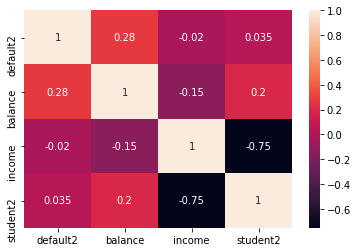

In [40]:
sns.heatmap(df[["default2", "balance", "income", "student2"]].corr(method="spearman"), annot=True)

<AxesSubplot:xlabel='default', ylabel='balance'>

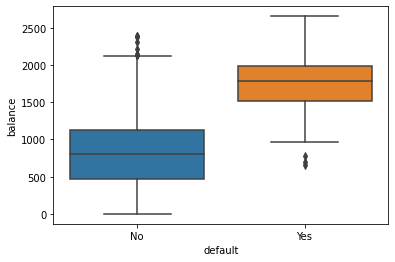

In [41]:
sns.boxplot(y="balance", x="default", data=df)

<AxesSubplot:xlabel='default', ylabel='income'>

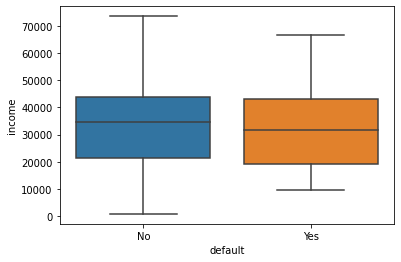

In [42]:
sns.boxplot(y="income", x="default", data=df)

<AxesSubplot:>

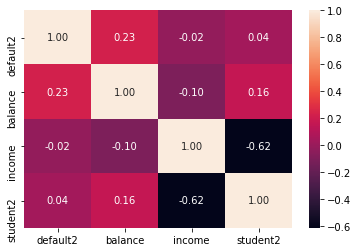

In [43]:
sns.heatmap(df[["default2", "balance", "income", "student2"]].corr(method="kendall"), annot=True, fmt=".2f")

In [44]:
sen_spec = confusion_matrix / confusion_matrix.sum(axis=0)
sen_spec

True default status,No,Yes
Predicted,,
No,0.997621,0.756757
Yes,0.002379,0.243243


In [45]:
#sensitivity
print("sensitivity:", sen_spec.loc["Yes", "Yes"])
#specificity
print("specificity:", sen_spec.loc["No", "No"])

sensitivity: 0.24324324324324326
specificity: 0.9976207716975277


The fitted LDA performs poorly on sensitivity

reduce threshold for posterior default probability to 0.2

In [46]:
predicted = (lda.predict_proba(X)[:, 1] > 0.2).astype(np.int32)
confusion_matrix = pd.DataFrame({"True default": y, "Predicted default": predicted}).replace({0: "No", 1: "Yes"}).value_counts().unstack(level=0)
display(confusion_matrix)
sen_spec = confusion_matrix / (confusion_matrix.sum(axis=0))
print("Sensitivity:", sen_spec.loc["Yes", "Yes"])
print("Specificity:", sen_spec.loc["No", "No"])

True default,No,Yes
Predicted default,,
No,9432,138
Yes,235,195


Sensitivity: 0.5855855855855856
Specificity: 0.975690493431261


In [47]:
y

0       No
1       No
2       No
3       No
4       No
        ..
9995    No
9996    No
9997    No
9998    No
9999    No
Name: default, Length: 10000, dtype: object

In [48]:
from sklearn.metrics import accuracy_score
print("New accuracy:", accuracy_score((y=="Yes").astype("int"), predicted))

New accuracy: 0.9627


In [49]:
from sklearn.metrics import classification_report
display(pd.DataFrame(classification_report(y.replace({"No": 0, "Yes": 1}), predicted,  output_dict=True)))

,0,1,accuracy,macro avg,weighted avg
precision,0.98558,0.453488,0.9627,0.719534,0.967861
recall,0.97569,0.585586,0.9627,0.780638,0.962700
f1-score,0.98061,0.511140,0.9627,0.745875,0.964977
support,9667.00000,333.000000,0.9627,10000.000000,10000.000000


### 4.4.3 Quadratic Discriminant Analysis

In [50]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [51]:
X = df[["balance", "student2"]].values
y = df["default2"].values

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2)

In [53]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
qda.score(X_train, y_train)

0.972375

In [54]:
accuracy_score(y_test, qda.predict(X_test))

0.9745

In [55]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.score(X_train, y_train)

0.971875

In [56]:
accuracy_score(y_test, lda.predict(X_test))

0.9745

In [58]:
from sklearn.naive_bayes import GaussianNB

In [60]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
naive_bayes.score(X_train, y_train)

0.971125

In [61]:
accuracy_score(y_test, naive_bayes.predict(X_test))

0.9705

In [62]:
naive_bayes = GaussianNB()
naive_bayes.fit(X, y)
naive_bayes.score(X, y)

0.9713

In [97]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, naive_bayes.predict(X))

array([[9618,   49],
       [ 238,   95]], dtype=int64)

In [98]:
y_pred = (naive_bayes.predict_proba(X)[:, 1] > 0.2).astype("int")

In [99]:
cols=pd.Series(["True", "False"], name="Actual")
index=pd.Series(["True", "False"], name="Predicted")

confusion_matrix = pd.DataFrame(confusion_matrix(y, y_pred), columns=iterables, index=index)


In [100]:
confusion_matrix

Actual,True,False
Predicted,,
True,9328,339
False,130,203


In [110]:
df.replace??

In [113]:
from sklearn.metrics import classification_report
pd.DataFrame(classification_report(y, y_pred, output_dict=True)).rename(columns={"0": "No", "1":"Yes"})

,No,Yes,accuracy,macro avg,weighted avg
precision,0.986255,0.374539,0.9531,0.680397,0.965885
recall,0.964932,0.609610,0.9531,0.787271,0.953100
f1-score,0.975477,0.464000,0.9531,0.719739,0.958445
support,9667.000000,333.000000,0.9531,10000.000000,10000.000000


## 4.6 Generalized Linear Models

### 4.6.1 Linear Regression on the Bikeshare Data

In [153]:
bikeshare = pd.read_csv("./Bikeshare/hour.csv")

In [154]:
bikeshare.workingday = pd.Categorical(bikeshare.workingday)
bikeshare.weathersit = pd.Categorical(bikeshare.weathersit)
bikeshare.hr = pd.Categorical(bikeshare.hr)
bikeshare.mnth = pd.Categorical(bikeshare.mnth)

In [157]:
est = smf.ols("cnt ~ workingday + weathersit + temp +mnth + hr", data=bikeshare).fit()

In [158]:
est

In [160]:
est.rsquared

0.6188956393150058

In [159]:
dir(est)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',

In [145]:
linreg.coef_

array([6.83687395e+02, 2.94916341e+00, 1.11864279e+15, 1.11864279e+15,
       1.11864279e+15, 1.11864279e+15, 4.67297666e+14, 4.67297666e+14,
       4.67297666e+14, 4.67297666e+14, 4.67297666e+14, 4.67297666e+14,
       4.67297666e+14, 4.67297666e+14, 4.67297666e+14, 4.67297666e+14,
       4.67297666e+14, 4.67297666e+14])

In [152]:
bikeshare

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [150]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 17379, dtype: int64

In [148]:
linreg.predict(X)

array([108.  ,  94.25,  94.25, ..., 115.  , 115.  , 115.  ])

In [ ]:
from sklearn

In [144]:
linreg.score(X, y)

0.22530365904691307

In [140]:
X = bikeshare.loc[:, ["temp", "workingday"]].join(pd.get_dummies(bikeshare.weathersit, prefix="w")).join(pd.get_dummies(bikeshare.mnth, prefix="m"))
y = bikeshare["cnt"]

In [141]:
X

,temp,workingday,w_1,w_2,w_3,w_4,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10,m_11,m_12
0,0.24,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0.22,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0.22,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0.24,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0.24,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
17375,0.26,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
17376,0.26,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
17377,0.26,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [142]:
linreg.intercept_

-13.298760562008084

In [143]:
linreg.fit(X, y)
linreg.coef_

array([6.83687395e+02, 2.94916341e+00, 1.11864279e+15, 1.11864279e+15,
       1.11864279e+15, 1.11864279e+15, 4.67297666e+14, 4.67297666e+14,
       4.67297666e+14, 4.67297666e+14, 4.67297666e+14, 4.67297666e+14,
       4.67297666e+14, 4.67297666e+14, 4.67297666e+14, 4.67297666e+14,
       4.67297666e+14, 4.67297666e+14])

In [ ]:
linreg

In [120]:
df

array([[ 0.24,  0.  , 16.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.22,  0.  , 40.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.22,  0.  , 32.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.26,  1.  , 90.  , ...,  1.  ,  0.  ,  0.  ],
       [ 0.26,  1.  , 61.  , ...,  0.  ,  1.  ,  0.  ],
       [ 0.26,  1.  , 49.  , ...,  0.  ,  0.  ,  1.  ]])

In [115]:
df=bikeshare.loc[:, ["temp", "workingday", "cnt"]].join(\
                                                     pd.get_dummies(bikeshare.weathersit, prefix="w")).join(\
                                                                                                            pd.get_dummies(bikeshare.mnth, prefix='m')).join(\
                                                                                                            pd.get_dummies(bikeshare.hr, prefix='h')).values

In [118]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
linreg.coef_

array([ 2.88164752e+02,  7.13521456e+00, -5.52606992e+14, -5.52606992e+14,
       -5.52606992e+14, -5.52606992e+14,  1.07241571e+14,  1.07241571e+14,
        1.07241571e+14,  1.07241571e+14,  1.07241571e+14,  1.07241571e+14,
        1.07241571e+14,  1.07241571e+14,  1.07241571e+14,  1.07241571e+14,
        1.07241571e+14,  1.07241571e+14, -1.54849232e+13, -1.54849232e+13,
       -1.54849232e+13, -1.54849232e+13, -1.54849232e+13, -1.54849232e+13,
       -1.54849232e+13, -1.54849232e+13, -1.54849232e+13, -1.54849232e+13,
       -1.54849232e+13, -1.54849232e+13, -1.54849232e+13, -1.54849232e+13,
       -1.54849232e+13, -1.54849232e+13, -1.54849232e+13, -1.54849232e+13,
       -1.54849232e+13, -1.54849232e+13, -1.54849232e+13, -1.54849232e+13,
       -1.54849232e+13, -1.54849232e+13])

In [117]:
smf.ols("cnt~", data=df).fit().summary().tables[1]

PatsyError: expected a noun, not ':'
    cnt~:
        ^

In [165]:
X = bikeshare.loc[:, ["temp", "workingday"]].join(\
                                                     pd.get_dummies(bikeshare.weathersit, prefix="w")).join(\
                                                                                                            pd.get_dummies(bikeshare.mnth, prefix='m')).join(\
                                                                                                            pd.get_dummies(bikeshare.hr, prefix='h')).values
y = bikeshare["cnt"]

In [166]:
import statsmodels as sm
est=sm.regression.linear_model.OLS(endog=y, exog=X).fit()

In [169]:
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [172]:
linreg.score(X, y)

0.6188947278643486

In [167]:
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
x1,288.7697,10.331,27.952,0.000,268.520,309.020
x2,7.3036,1.838,3.974,0.000,3.701,10.906
x3,6.354e+13,9.74e+13,0.653,0.514,-1.27e+14,2.54e+14
x4,6.354e+13,9.74e+13,0.653,0.514,-1.27e+14,2.54e+14
x5,6.354e+13,9.74e+13,0.653,0.514,-1.27e+14,2.54e+14
x6,6.354e+13,9.74e+13,0.653,0.514,-1.27e+14,2.54e+14
x7,-1.042e+14,1.6e+14,-0.653,0.514,-4.17e+14,2.09e+14
x8,-1.042e+14,1.6e+14,-0.653,0.514,-4.17e+14,2.09e+14
x9,-1.042e+14,1.6e+14,-0.653,0.514,-4.17e+14,2.09e+14
x10,-1.042e+14,1.6e+14,-0.653,0.514,-4.17e+14,2.09e+14


In [174]:
est.rsquaredaj

AttributeError: 'OLSResults' object has no attribute 'rsquaredaj'

In [111]:
dir(est)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_data_attr',
 '_df_model',
 '_df_resid',
 '_fit_collinear',
 '_fit_ridge',
 '_fit_zeros',
 '_formula_max_endog',
 '_get_init_kwds',
 '_handle_data',
 '_init_keys',
 '_setup_score_hess',
 '_sqrt_lasso',
 'data',
 'df_model',
 'df_resid',
 'endog',
 'endog_names',
 'exog',
 'exog_names',
 'fit',
 'fit_regularized',
 'from_formula',
 'get_distribution',
 'hessian',
 'hessian_factor',
 'information',
 'initialize',
 'k_constant',
 'loglike',
 'nobs',
 'predict',
 'rank',
 'score',
 'weights',
 'wendog',
 'wexog',
 'whiten']

In [98]:

est

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-96.6899,5.592,-17.290,0.000,-107.651,-85.729
workingday[T.1],7.3097,1.838,3.978,0.000,3.708,10.912
weathersit[T.2],-18.9504,1.992,-9.513,0.000,-22.855,-15.046
weathersit[T.3],-90.5480,3.183,-28.449,0.000,-96.787,-84.309
weathersit[T.4],-76.0046,64.838,-1.172,0.241,-203.093,51.084
mnth[T.2],1.8553,4.314,0.430,0.667,-6.601,10.311
mnth[T.3],19.1084,4.449,4.295,0.000,10.388,27.829
mnth[T.4],30.1957,4.818,6.267,0.000,20.752,39.639
mnth[T.5],30.0612,5.525,5.441,0.000,19.232,40.891
mnth[T.6],16.1592,6.180,2.615,0.009,4.045,28.273


In [11]:
bikeshare.columns.difference(["hr"])

Index(['atemp', 'casual', 'cnt', 'dteday', 'holiday', 'hum', 'instant', 'mnth',
       'registered', 'season', 'temp', 'weathersit', 'weekday', 'windspeed',
       'workingday', 'yr'],
      dtype='object')

In [ ]:
bike

In [47]:
bikeshare_agg = bikeshare.groupby(by=(["dteday", "workingday", "weathersit"]))["casual", "cnt", "temp"].agg([np.sum, np.mean])

C:\Users\lamtr\anaconda3\envs\clone_3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [48]:
bikeshare_agg.columns = [j + '_' + i for (i, j) in bikeshare_agg.columns]

In [63]:
pd.get_dummies?

In [66]:
bikeshare = bikeshare.join(pd.get_dummies(bikeshare.weathersit, prefix="ws"))

In [68]:
bikeshare

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,ws_1,ws_2,ws_3,ws_4
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.2879,0.81,0.0000,3,13,16,1,0,0,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.2727,0.80,0.0000,8,32,40,1,0,0,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.2727,0.80,0.0000,5,27,32,1,0,0,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.2879,0.75,0.0000,3,10,13,1,0,0,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.2879,0.75,0.0000,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,...,0.2576,0.60,0.1642,11,108,119,0,1,0,0
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,...,0.2576,0.60,0.1642,8,81,89,0,1,0,0
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,...,0.2576,0.60,0.1642,7,83,90,1,0,0,0
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,...,0.2727,0.56,0.1343,13,48,61,1,0,0,0


In [78]:
bikeshare.weathersit = pd.Categorical(bikeshare.weathersit)

In [79]:
bikeshare.weathersit

0      2
1      2
2      1
3      1
4      1
      ..
726    2
727    2
728    2
729    1
730    2
Name: weathersit, Length: 731, dtype: category
Categories (3, int64): [1, 2, 3]

In [55]:
bikeshare_agg.loc["2011-03-31", :]

sum_casual  mean_casual  sum_cnt    mean_cnt  sum_temp  \
workingday weathersit                                                           
1          2                   66    11.000000      812  135.333333      1.72   
           3                  113     6.277778      873   48.500000      4.72   

                       mean_temp  
workingday weathersit             
1          2            0.286667  
           3            0.262222

In [82]:
bikeshare.weathersit.cat.codes

0      1
1      1
2      0
3      0
4      0
      ..
726    1
727    1
728    1
729    0
730    1
Length: 731, dtype: int8

In [88]:
bikeshare.mnth = pd.Categorical(bikeshare.mnth)

In [90]:
import statsmodels.formula.api as smf
est = smf.ols("cnt ~ +mnth", data=bikeshare).fit().summary().tables[1]
est

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2176.3387,193.514,11.246,0.000,1796.419,2556.259
mnth[T.2],478.9595,279.607,1.713,0.087,-69.985,1027.904
mnth[T.3],1515.9194,273.670,5.539,0.000,978.631,2053.208
mnth[T.4],2308.5613,275.941,8.366,0.000,1766.814,2850.308
mnth[T.5],3173.4355,273.670,11.596,0.000,2636.147,3710.724
mnth[T.6],3596.0280,275.941,13.032,0.000,3054.281,4137.775
mnth[T.7],3387.3387,273.670,12.377,0.000,2850.051,3924.627
mnth[T.8],3488.0806,273.670,12.746,0.000,2950.792,4025.369
mnth[T.9],3590.1780,275.941,13.011,0.000,3048.431,4131.925
mnth[T.10],3022.8871,273.670,11.046,0.000,2485.599,3560.175


In [85]:
dir(est)

['_Cell',
 '_Row',
 '__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_add_headers_stubs',
 '_colwidths',
 '_csv_fmt',
 '_data2rows',
 '_datatypes',
 '_get_colwidths',
 '_get_fmt',
 '_html_fmt',
 '_latex_fmt',
 '_repr_html_',
 '_txt_fmt',
 'append',
 'as_csv',
 'as_html',
 'as_latex_tabular',
 'as_text',
 'clear',
 'copy',
 'count',
 'data',
 'extend',
 'extend_right',
 'get_colwidths',
 'index',
 'insert',
 'insert_header_row',
 'insert_stubs',
 'label_cells',
 'output_formats',
 'pad',
 'pop',
 'remove

In [83]:
bikeshare.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,ws_1,ws_2,ws_3
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,0,1,0
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,0,1,0
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,1,0,0
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,1,0,0
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,1,0,0


In [ ]:
bikshare.groupby(["mnth"]).

## 4.7 Lab: Classification Methods

In [92]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, r2_score, accuracy_score
from sklearn.linear_model import LogisticRegression

### 4.7.1 The Stock Market Data

In [15]:
data = pd.read_csv("Smarket.csv")
display(data.head())
display(data.describe())
display(data.info())
data.shape

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1250.000000,1250.000000,1250.000000,1250.000000,1250.000000,1250.00000,1250.000000,1250.000000
mean,2003.016000,0.003834,0.003919,0.001716,0.001636,0.00561,1.478305,0.003138
std,1.409018,1.136299,1.136280,1.138703,1.138774,1.14755,0.360357,1.136334
min,2001.000000,-4.922000,-4.922000,-4.922000,-4.922000,-4.92200,0.356070,-4.922000
25%,2002.000000,-0.639500,-0.639500,-0.640000,-0.640000,-0.64000,1.257400,-0.639500
50%,2003.000000,0.039000,0.039000,0.038500,0.038500,0.03850,1.422950,0.038500
75%,2004.000000,0.596750,0.596750,0.596750,0.596750,0.59700,1.641675,0.596750
max,2005.000000,5.733000,5.733000,5.733000,5.733000,5.73300,3.152470,5.733000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1250 non-null   int64  
 1   Lag1       1250 non-null   float64
 2   Lag2       1250 non-null   float64
 3   Lag3       1250 non-null   float64
 4   Lag4       1250 non-null   float64
 5   Lag5       1250 non-null   float64
 6   Volume     1250 non-null   float64
 7   Today      1250 non-null   float64
 8   Direction  1250 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB


None

(1250, 9)

In [17]:
data.Direction.describe()

count     1250
unique       2
top         Up
freq       648
Name: Direction, dtype: object

In [20]:
pd.set_option("display.precision",2)

In [100]:
#create mask 
r, c = np.triu_indices_from(a)
a[r, c] = 1
a[np.diag_indices(a.shape[0])] = 0 
a

array([[0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

[None, None]

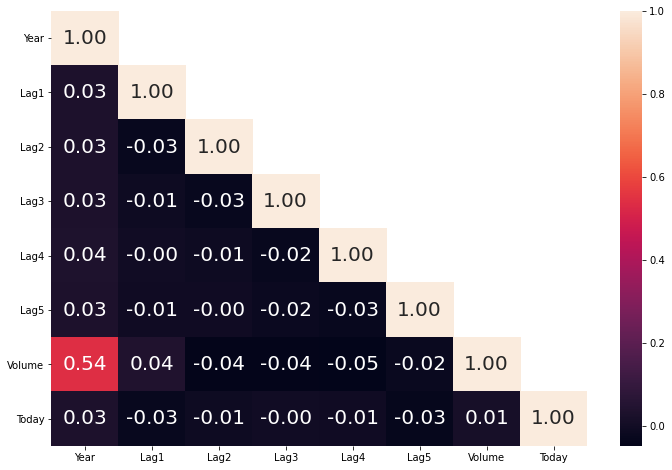

In [101]:
ax = sns.heatmap(data.corr(), fmt=".2f", annot=True, annot_kws={"fontsize":20}, mask=a)
plt.gcf().set(figwidth=12, figheight=8)

In [259]:
year

(2001, 2002, 2003, 2004, 2005)

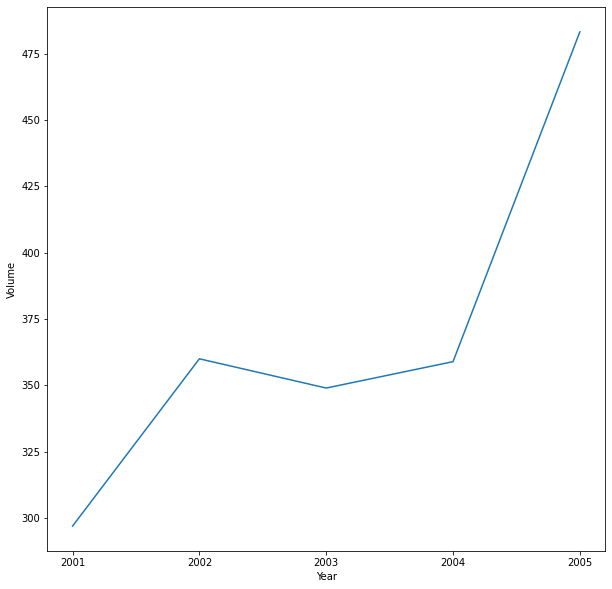

In [285]:
year, values = list(zip(*data.groupby("Year")["Volume"].sum().to_dict().items()))
plt.figure(figsize=(10, 10))
plt.gca().set(xlabel="Year", ylabel="Volume")
plt.plot(year, values)
plt.gca().set_xticks(year);

In [297]:
data["Direction_encoded"] = data["Direction"].map({"Up":1, "Down":0})

In [296]:
data.Direction.unique()

array(['Up', 'Down'], dtype=object)

In [301]:
data = data.join(pd.get_dummies(data["Direction"]))

In [302]:
data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction_encoded,Down,Up
0,2001,0.38,-0.19,-2.62,-1.05,5.01,1.19,0.96,Up,1,0,1
1,2001,0.96,0.38,-0.19,-2.62,-1.05,1.30,1.03,Up,1,0,1
2,2001,1.03,0.96,0.38,-0.19,-2.62,1.41,-0.62,Down,0,1,0
3,2001,-0.62,1.03,0.96,0.38,-0.19,1.28,0.61,Up,1,0,1
4,2001,0.61,-0.62,1.03,0.96,0.38,1.21,0.21,Up,1,0,1


In [303]:
#logistic regression fitting using statsmodel
est = smf.logit("Direction_encoded ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume", data=data).fit()
est.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.691034
         Iterations 4


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-0.1260,0.241,-0.523,0.601,-0.598,0.346
Lag1,-0.0731,0.050,-1.457,0.145,-0.171,0.025
Lag2,-0.0423,0.050,-0.845,0.398,-0.140,0.056
Lag3,0.0111,0.050,0.222,0.824,-0.087,0.109
Lag4,0.0094,0.050,0.187,0.851,-0.089,0.107
Lag5,0.0103,0.050,0.208,0.835,-0.087,0.107
Volume,0.1354,0.158,0.855,0.392,-0.175,0.446


In [343]:
est.params

Intercept   -1.26e-01
Lag1        -7.31e-02
Lag2        -4.23e-02
Lag3         1.11e-02
Lag4         9.36e-03
Lag5         1.03e-02
Volume       1.35e-01
dtype: float64

The lowest <i>p-value</i> is associated with `Lag1`.
The negative coefficients associated with predictors indicates that the positive returns of the previous days would likely leady to a downturn today. However, large p-value shows that there is hardly an association between predictiors and response.

In [341]:
#logistic regression fitting using sklearn
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
X = data[data.columns.difference(
    ["Year", "Today", "Direction_encoded", "Up", "Down", "Direction"])].values
y = data["Direction_encoded"].values
logreg.fit(X, y)
print("R2:", logreg.score(X, y))
display(pd.DataFrame(logreg.coef_.tolist()[0] + logreg.intercept_.tolist(),
      index=data.columns.difference(
          ["Year", "Today", "Direction_encoded", "Up", "Down", "Direction"]).tolist() + ["Intercept"]))

R2: 0.5208


,0
Lag1,-7.28e-02
Lag2,-4.22e-02
Lag3,1.10e-02
Lag4,9.28e-03
Lag5,1.03e-02
Volume,1.32e-01
Intercept,-1.21e-01


In [360]:
y_pred = (est.predict() >= 0.5).astype("int")

In [368]:
confusion_matrix(y, y_pred).ravel()

array([145, 457, 141, 507], dtype=int64)

In [370]:
pd.DataFrame(confusion_matrix(y, y_pred).T, columns=pd.Series(["Down", "Up"], name="Actual"), index=pd.Series(["Down", "Up"], name="Predicted"))

Actual,Down,Up
Predicted,,
Down,145,141
Up,457,507


In [371]:
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.5216

Training accuracy is 52%, meaning the test accuracy is much lower than this, and lower than a ramdom 50/50 guess

So next, we hold out the data in 2005 as the validation set

In [384]:
data[data["Year"] < 2005]

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction,Direction_encoded,Down,Up
0,2001,3.81e-01,-1.92e-01,-2.62,-1.05,5.01,1.19,9.59e-01,Up,1,0,1
1,2001,9.59e-01,3.81e-01,-0.19,-2.62,-1.05,1.30,1.03e+00,Up,1,0,1
2,2001,1.03e+00,9.59e-01,0.38,-0.19,-2.62,1.41,-6.23e-01,Down,0,1,0
3,2001,-6.23e-01,1.03e+00,0.96,0.38,-0.19,1.28,6.14e-01,Up,1,0,1
4,2001,6.14e-01,-6.23e-01,1.03,0.96,0.38,1.21,2.13e-01,Up,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
993,2004,4.60e-02,3.42e-01,0.90,0.04,-0.75,0.96,-4.31e-01,Down,0,1,0
994,2004,-4.31e-01,4.60e-02,0.34,0.90,0.04,0.92,7.15e-01,Up,1,0,1
995,2004,7.15e-01,-4.31e-01,0.05,0.34,0.90,0.98,-7.00e-03,Down,0,1,0
996,2004,-7.00e-03,7.15e-01,-0.43,0.05,0.34,0.93,8.00e-03,Up,1,0,1


In [374]:
training_index = data[data["Year"] < 2005].shape[0]
X_train = X[:training_index]
y_train = y[:training_index]
X_val = X[training_index:]
y_val = y[training_index:]

In [388]:
logreg.fit(X_train, y_train)
print("Test error rate on the 2005 data:", np.mean(logreg.predict(X_val) != y_val))

Test error rate on the 2005 data: 0.5158730158730159


Calculate f-score

In [402]:
from sklearn.feature_selection import f_classif
f, p = f_classif(X, y)
pd.DataFrame({"F-statistics": f, "p-values": p}, index=columns)

,F-statistics,p-values
Lag1,1.98,0.16
Lag2,0.72,0.39
Lag3,0.05,0.83
Lag4,0.02,0.88
Lag5,0.04,0.85
Volume,0.66,0.42


In [399]:
columns

['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume']

In [403]:
from sklearn.feature_selection import mutual_info_classif
columns = data.columns.difference(
          ["Year", "Today", "Direction_encoded", "Up", "Down", "Direction"]).tolist()
pd.DataFrame(mutual_info_classif(X_train, y_train).T, index=columns)

,0
Lag1,0.00e+00
Lag2,4.04e-03
Lag3,0.00e+00
Lag4,0.00e+00
Lag5,0.00e+00
Volume,6.04e-03


### <font color="blue"> Applied Exercises </font>

#### 13

In [5]:
data = pd.read_csv("Weekly.csv")

In [7]:
data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


##### Produce some numerical and graphical summaries of the Weekly data. Do there appear to be any patterns?

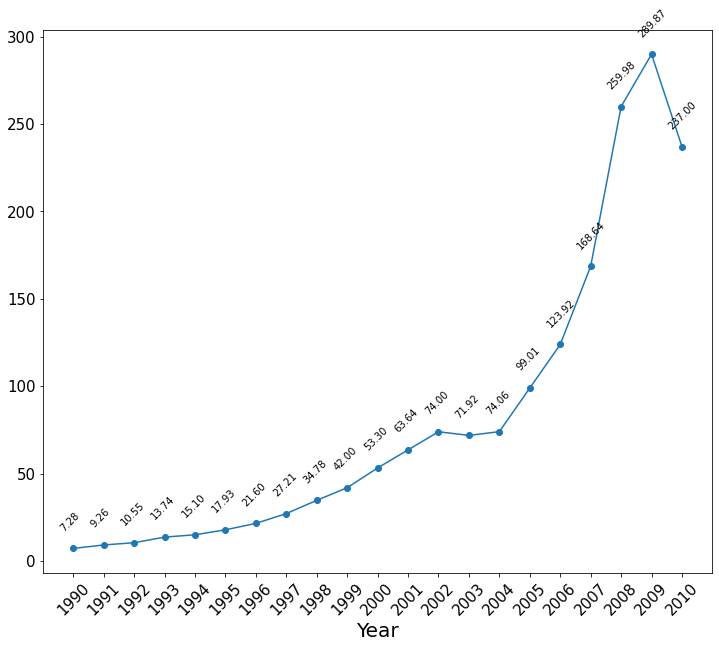

In [43]:
volumeByYear = data.groupby("Year")["Volume"].agg("sum")
ax = volumeByYear.plot(figsize=(12, 10), fontsize=15)
ax.xaxis.label.set_size(20)
ax.set_xticks(volumeByYear.index)
ax.set_xticklabels(ax.get_xticks(), rotation=45)
ax.scatter(volumeByYear.index, volumeByYear.values)
for x, y in zip(volumeByYear.index, volumeByYear.values):
    plt.annotate(text=f"{y:.2f}", xy=(x, y), xytext=(x-0.5, y+10), fontsize=10, rotation=45)

[None, None]

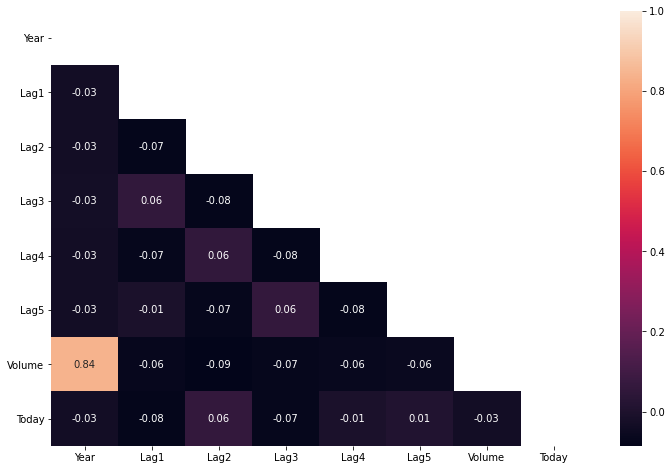

In [56]:
mask = np.zeros(data.corr().shape)
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(data.corr(), annot=True, fmt=".2f", mask=mask)
plt.gcf().set(figwidth=12, figheight=8)

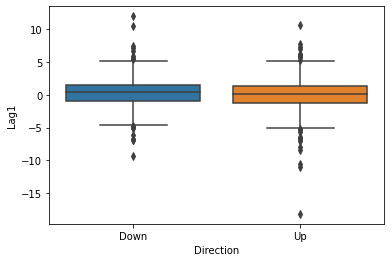

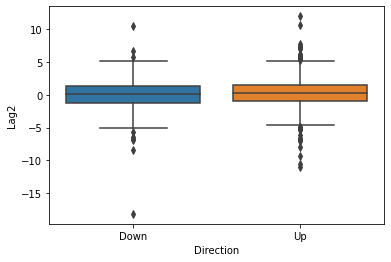

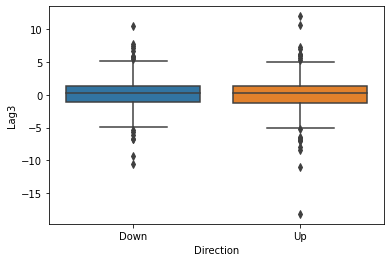

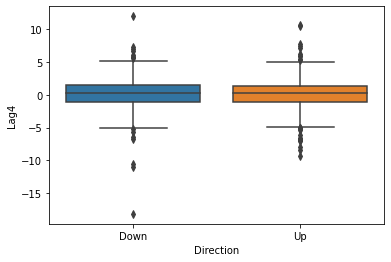

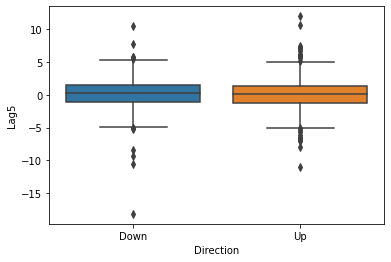

In [62]:
for i in range(1, 6):
    sns.boxplot(x="Direction", y="Lag"+str(i), data=data)
    plt.show()

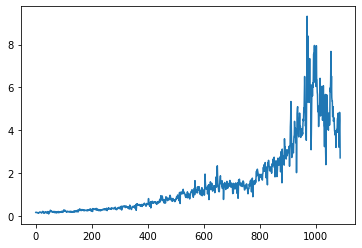

In [64]:
plt.plot(data.Volume)

##### Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [72]:
data["Direction_encoded"] = np.where(data["Direction"] == "Up", 1, 0)
est = smf.logit("Direction_encoded ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume", data=data).fit()
est.summary().tables[1]

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,0.2669,0.086,3.106,0.002,0.098,0.435
Lag1,-0.0413,0.026,-1.563,0.118,-0.093,0.010
Lag2,0.0584,0.027,2.175,0.030,0.006,0.111
Lag3,-0.0161,0.027,-0.602,0.547,-0.068,0.036
Lag4,-0.0278,0.026,-1.050,0.294,-0.080,0.024
Lag5,-0.0145,0.026,-0.549,0.583,-0.066,0.037
Volume,-0.0227,0.037,-0.616,0.538,-0.095,0.050


`Lag2` seems to be positively associated with the response `Direction` and be statistically significant.

##### Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [83]:
accuracy_score(data["Direction_encoded"], (est.predict() > 0.5).astype("int"))

0.5610651974288338

In [88]:
pd.DataFrame(confusion_matrix(data["Direction_encoded"], est.predict() > 0.5).T, 
             columns=pd.Series(["Down","Up"], name="Predicted"),
             index=pd.Series(["Down", "Up"], name="Actual"))

Predicted,Down,Up
Actual,,
Down,54,48
Up,430,557


Proportion of observations with "Up"

In [89]:
data["Direction_encoded"].mean()

0.5555555555555556

The accuracy of the Logistic Regression model is 56%, just a bit higher 55% which is the proportion of Up examples in the dataset. So if a person assigns all examples to be Up, then the accuracy is 55%. This means the fitted model does not perform any better than a non-ML method.

##### Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [185]:
X_train = data[data["Year"] < 2009]["Lag2"].values.reshape(-1, 1)
y_train = data[data["Year"] < 2009]["Direction_encoded"].values
X_val = data[data["Year"] >= 2009]["Lag2"].values.reshape(-1, 1)
y_val = data[data["Year"] >= 2009]["Direction_encoded"].values

In [103]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_train, logreg.predict(X_train)))

Accuracy: 0.5553299492385787


In [104]:
y_val_pred = logreg.predict(X_val)
pd.DataFrame(confusion_matrix(y_val, y_val_pred).T, 
             columns=pd.Series(["Down","Up"], name="Predicted"),
             index=pd.Series(["Down", "Up"], name="Actual"))

Predicted,Down,Up
Actual,,
Down,9,5
Up,34,56


In [105]:
print("Val acc:", accuracy_score(y_val, y_val_pred))

Val acc: 0.625


##### Repeat (d) using LDA.

In [108]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
lda = LDA()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [109]:
print("Accuracy:", accuracy_score(y_train, lda.predict(X_train)))

Accuracy: 0.5543147208121827


In [110]:
y_val_pred = lda.predict(X_val)
pd.DataFrame(confusion_matrix(y_val, y_val_pred).T, 
             columns=pd.Series(["Down","Up"], name="Predicted"),
             index=pd.Series(["Down", "Up"], name="Actual"))

Predicted,Down,Up
Actual,,
Down,9,5
Up,34,56


##### Repeat (d) using QDA.

In [111]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA 
qda = QDA()
qda.fit(X_train, y_train)
print("Accuracy:", accuracy_score(y_train, qda.predict(X_train)))
y_val_pred = qda.predict(X_val)
pd.DataFrame(confusion_matrix(y_val, y_val_pred).T, 
             columns=pd.Series(["Down","Up"], name="Predicted"),
             index=pd.Series(["Down", "Up"], name="Actual"))

Accuracy: 0.5522842639593909


Predicted,Down,Up
Actual,,
Down,0,0
Up,43,61


In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [138]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)

0.617258883248731

In [139]:
knn.score(X_val, y_val)

0.5865384615384616

In [140]:
pd.DataFrame(confusion_matrix(y_val, knn.predict(X_val)).T, 
             columns=pd.Series(["Down","Up"], name="Predicted"),
             index=pd.Series(["Down", "Up"], name="Actual"))

Predicted,Down,Up
Actual,,
Down,20,20
Up,23,41


In [156]:
poly.get_params

<bound method BaseEstimator.get_params of PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')>

In [160]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import PredefinedSplit

X = data[["Lag1", "Lag2", "Lag3", "Lag4","Lag5", "Volume"]]
y = data["Direction_encoded"]
poly = PolynomialFeatures()
X_poly = poly.fit_transform(X)
logreg.fit(X_poly, y)
logreg.score(X_poly, y)

0.5647382920110193

In [174]:
pipeline = Pipeline([("Poly", PolynomialFeatures()), ("LogisticRegression", LogisticRegression())])
gridsearch = GridSearchCV(estimator=pipeline, param_grid={"Poly__degree":[i for i in range(1, 21)], "Poly__interaction_only":[True, False]}, cv=ps)

In [175]:
gridsearch.fit(X, y)

C:\Users\lamtr\anaconda3\envs\clone_3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\lamtr\anaconda3\envs\clone_3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/line

C:\Users\lamtr\anaconda3\envs\clone_3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\lamtr\anaconda3\envs\clone_3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

C:\Users\lamtr\anaconda3\envs\clone_3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\lamtr\anaconda3\envs\clone_3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('Poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('LogisticRegression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_rati

In [190]:
pd.DataFrame(gridsearch.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_Poly__degree,param_Poly__interaction_only,params,split0_test_score,mean_test_score,std_test_score,rank_test_score
5,0.049968,0.0,0.001001,0.0,3,False,"{'Poly__degree': 3, 'Poly__interaction_only': ...",0.625000,0.625000,0.0,1
4,0.060389,0.0,0.001996,0.0,3,True,"{'Poly__degree': 3, 'Poly__interaction_only': ...",0.596154,0.596154,0.0,2
15,1.812520,0.0,0.004999,0.0,8,False,"{'Poly__degree': 8, 'Poly__interaction_only': ...",0.586538,0.586538,0.0,3
17,2.756534,0.0,0.005999,0.0,9,False,"{'Poly__degree': 9, 'Poly__interaction_only': ...",0.576923,0.576923,0.0,4
2,0.053963,0.0,0.000997,0.0,2,True,"{'Poly__degree': 2, 'Poly__interaction_only': ...",0.567308,0.567308,0.0,5
3,0.061308,0.0,0.002003,0.0,2,False,"{'Poly__degree': 2, 'Poly__interaction_only': ...",0.567308,0.567308,0.0,5
6,0.076403,0.0,0.002004,0.0,4,True,"{'Poly__degree': 4, 'Poly__interaction_only': ...",0.557692,0.557692,0.0,7
28,0.059000,0.0,0.002001,0.0,15,True,"{'Poly__degree': 15, 'Poly__interaction_only':...",0.538462,0.538462,0.0,8
34,0.066001,0.0,0.001000,0.0,18,True,"{'Poly__degree': 18, 'Poly__interaction_only':...",0.538462,0.538462,0.0,8
26,0.091001,0.0,0.001997,0.0,14,True,"{'Poly__degree': 14, 'Poly__interaction_only':...",0.538462,0.538462,0.0,8


In [183]:
pd.DataFrame(gridsearch.cv_results_).sort_values(by="rank_test_score")["params"][5]

{'Poly__degree': 3, 'Poly__interaction_only': False}

In [191]:
pipeline = Pipeline([("Poly", PolynomialFeatures(degree=3, interaction_only=False)), ("LogisticRegression", LogisticRegression())])


In [192]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('Poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('LogisticRegression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [193]:
pipeline.score(X_val, y_val)

0.5865384615384616

In [194]:
pipeline.score(X_train, y_train)

0.5532994923857868

In [206]:
X_train = data[data["Year"] < 2009][["Lag1", "Lag2", "Lag3", "Lag4","Lag5", "Volume"]].values
y_train = data[data["Year"] < 2009]["Direction_encoded"].values
X_val = data[data["Year"] >= 2009][["Lag1", "Lag2", "Lag3", "Lag4","Lag5", "Volume"]].values
y_val = data[data["Year"] >= 2009]["Direction_encoded"].values

In [207]:
pipeline = Pipeline([("Poly", PolynomialFeatures(degree=3, interaction_only=False)), ("LogisticRegression", LogisticRegression())])
pipeline.fit(X_train, y_train)

C:\Users\lamtr\anaconda3\envs\clone_3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('Poly',
                 PolynomialFeatures(degree=3, include_bias=True,
                                    interaction_only=False, order='C')),
                ('LogisticRegression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [208]:
pipeline.score(X_val, y_val)

0.625

In [209]:
pipeline.score(X_train, y_train)

0.6253807106598985